In [46]:
import pandas as pd
import wget
import numpy as np
import altair as alt

In [47]:
# urls of raw csv dataset
urls = ['https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv',
       'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv',
       'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv']

[wget.download(url) for url in urls]

['time_series_covid19_confirmed_global (3).csv',
 'time_series_covid19_deaths_global (3).csv',
 'time_series_covid19_recovered_global (3).csv']

In [48]:
confirmed_df = pd.read_csv('time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('time_series_covid19_deaths_global.csv')
recovered_df = pd.read_csv('time_series_covid19_recovered_global.csv')

In [49]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,44443,44503,44706,44988,45280,45490,45716,45839,45966,46215
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,31459,32196,32761,33556,34300,34944,35600,36245,36790,37625
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,72755,73774,74862,75867,77000,78025,79110,80168,81212,82221
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,6142,6207,6256,6304,6351,6428,6534,6610,6610,6712
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,14267,14413,14493,14634,14742,14821,14920,15008,15087,15103


In [50]:
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1661,1675,1687,1695,1712,1725,1737,1740,1752,1763
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,672,685,699,716,735,743,753,771,787,798
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,2236,2255,2272,2294,2309,2329,2352,2372,2393,2410
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,76,76,76,76,76,76,76,76,76,76
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,334,336,337,337,338,340,341,342,345,346


In [51]:
recovered_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,35370,35422,35934,35976,36122,36145,36232,36295,36709,36731
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,15055,15469,15842,16230,16666,17031,17352,17755,18152,18481
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,47581,48183,48794,49421,50070,50712,51334,51946,52568,53204
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,5239,5290,5358,5405,5503,5542,5649,5710,5710,5794
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,7117,7273,7346,7351,7444,7517,7617,7697,7763,7763


In [52]:
#confirmed_df.columns

confirmed_df.columns[4:]

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '11/20/20', '11/21/20', '11/22/20', '11/23/20', '11/24/20', '11/25/20',
       '11/26/20', '11/27/20', '11/28/20', '11/29/20'],
      dtype='object', length=313)

In [53]:
dates = confirmed_df.columns[4:]

confirmed_df_long = confirmed_df.melt(
    id_vars = ['Province/State', 'Country/Region', 'Lat', 'Long'],
    value_vars = dates,
    var_name = 'Date',
    value_name = 'Confirmed'
)

deaths_df_long = deaths_df.melt(
    id_vars = ['Province/State', 'Country/Region', 'Lat', 'Long'],
    value_vars = dates,
    var_name = 'Date',
    value_name = 'Deaths'
)

recovered_df_long = recovered_df.melt(
    id_vars = ['Province/State', 'Country/Region', 'Lat', 'Long'],
    value_vars = dates,
    var_name = 'Date',
    value_name = 'Recovered'
)

In [54]:
confirmed_df_long

,Province/State,Country/Region,Lat,Long,Date,Confirmed
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
84818,NaN,West Bank and Gaza,31.952200,35.233200,11/29/20,83585
84819,NaN,Western Sahara,24.215500,-12.885800,11/29/20,10
84820,NaN,Yemen,15.552727,48.516388,11/29/20,2177
84821,NaN,Zambia,-13.133897,27.849332,11/29/20,17608


In [55]:
recovered_df_long = recovered_df_long[recovered_df_long['Country/Region']!='Canada']

In [56]:
# Merging confirmed_df_long and deaths_df_long
full_table = confirmed_df_long.merge(
  right=deaths_df_long, 
  how='left',
  on=['Province/State', 'Country/Region', 'Date', 'Lat', 'Long']
)

# Merging full_table and recovered_df_long
full_table = full_table.merge(
  right=recovered_df_long, 
  how='left',
  on=['Province/State', 'Country/Region', 'Date', 'Lat', 'Long']
)

In [57]:
full_table

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0,0,0.0
1,NaN,Albania,41.153300,20.168300,1/22/20,0,0,0.0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0,0,0.0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0,0,0.0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0,0,0.0
...,...,...,...,...,...,...,...,...
84818,NaN,West Bank and Gaza,31.952200,35.233200,11/29/20,83585,717,63834.0
84819,NaN,Western Sahara,24.215500,-12.885800,11/29/20,10,1,8.0
84820,NaN,Yemen,15.552727,48.516388,11/29/20,2177,617,1504.0
84821,NaN,Zambia,-13.133897,27.849332,11/29/20,17608,357,16983.0


In [58]:
# Cleaning the data now

In [59]:
# Converting string dates to actual Date values
full_table['Date'] = pd.to_datetime(full_table['Date'])

In [60]:
full_table

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0.0
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0.0
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0.0
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0.0
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0.0
...,...,...,...,...,...,...,...,...
84818,NaN,West Bank and Gaza,31.952200,35.233200,2020-11-29,83585,717,63834.0
84819,NaN,Western Sahara,24.215500,-12.885800,2020-11-29,10,1,8.0
84820,NaN,Yemen,15.552727,48.516388,2020-11-29,2177,617,1504.0
84821,NaN,Zambia,-13.133897,27.849332,2020-11-29,17608,357,16983.0


In [61]:
# Cleaning the Nan Values
full_table.isna().sum()

Province/State    58844
Country/Region        0
Lat                 313
Long                313
Date                  0
Confirmed             0
Deaths                0
Recovered          6573
dtype: int64

In [62]:
full_table['Recovered'] = full_table['Recovered'].fillna(0)
full_table['Lat'] = full_table['Lat'].fillna(0)
full_table['Long'] = full_table['Long'].fillna(0)
full_table.isna().sum()

Province/State    58844
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

In [63]:
# Removing the data about the Cruise Ships
ship_rows = full_table['Province/State'].str.contains('Grand Princess') | full_table['Province/State'].str.contains('Diamond Princess') | full_table['Country/Region'].str.contains('Diamond Princess') | full_table['Country/Region'].str.contains('MS Zaandam')
            
full_ship = full_table[ship_rows]
full_ship

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
41,Diamond Princess,Canada,0.0,0.0,2020-01-22,0,0,0.0
42,Grand Princess,Canada,0.0,0.0,2020-01-22,0,0,0.0
104,NaN,Diamond Princess,0.0,0.0,2020-01-22,0,0,0.0
170,NaN,MS Zaandam,0.0,0.0,2020-01-22,0,0,0.0
312,Diamond Princess,Canada,0.0,0.0,2020-01-23,0,0,0.0
...,...,...,...,...,...,...,...,...
84451,NaN,MS Zaandam,0.0,0.0,2020-11-28,9,2,0.0
84593,Diamond Princess,Canada,0.0,0.0,2020-11-29,0,1,0.0
84594,Grand Princess,Canada,0.0,0.0,2020-11-29,13,0,0.0
84656,NaN,Diamond Princess,0.0,0.0,2020-11-29,712,13,659.0


In [64]:
# Removing the data of the cruise ships
full_table = full_table[~(ship_rows)]

In [65]:
# working now

In [66]:
# Active Case = confirmed - deaths - recovered
pd.options.mode.chained_assignment = None  # default='warn'
full_table['Active'] = full_table['Confirmed'] - full_table['Deaths'] - full_table['Recovered']

In [67]:
full_table

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0.0,0.0
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0.0,0.0
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0.0,0.0
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0.0,0.0
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
84818,NaN,West Bank and Gaza,31.952200,35.233200,2020-11-29,83585,717,63834.0,19034.0
84819,NaN,Western Sahara,24.215500,-12.885800,2020-11-29,10,1,8.0,1.0
84820,NaN,Yemen,15.552727,48.516388,2020-11-29,2177,617,1504.0,56.0
84821,NaN,Zambia,-13.133897,27.849332,2020-11-29,17608,357,16983.0,268.0


In [68]:
# adding the data of provinces and thus removing them from the table
full_grouped = full_table.groupby(['Date', 'Country/Region'])[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()

In [69]:
full_grouped

,Date,Country/Region,Confirmed,Deaths,Recovered,Active
0,2020-01-22,Afghanistan,0,0,0.0,0.0
1,2020-01-22,Albania,0,0,0.0,0.0
2,2020-01-22,Algeria,0,0,0.0,0.0
3,2020-01-22,Andorra,0,0,0.0,0.0
4,2020-01-22,Angola,0,0,0.0,0.0
...,...,...,...,...,...,...
59152,2020-11-29,West Bank and Gaza,83585,717,63834.0,19034.0
59153,2020-11-29,Western Sahara,10,1,8.0,1.0
59154,2020-11-29,Yemen,2177,617,1504.0,56.0
59155,2020-11-29,Zambia,17608,357,16983.0,268.0


In [70]:
# new cases 
temp = full_grouped.groupby(['Country/Region', 'Date', ])['Confirmed', 'Deaths', 'Recovered']
temp = temp.sum().diff().reset_index()
mask = temp['Country/Region'] != temp['Country/Region'].shift(1)
temp.loc[mask, 'Confirmed'] = np.nan
temp.loc[mask, 'Deaths'] = np.nan
temp.loc[mask, 'Recovered'] = np.nan

# renaming columns
temp.columns = ['Country/Region', 'Date', 'New cases', 'New deaths', 'New recovered']

# merging new values
full_grouped = pd.merge(full_grouped, temp, on=['Country/Region', 'Date'])

# filling na with 0
full_grouped = full_grouped.fillna(0)

# fixing data types
cols = ['New cases', 'New deaths', 'New recovered']
full_grouped[cols] = full_grouped[cols].astype('int')

# 
full_grouped['New cases'] = full_grouped['New cases'].apply(lambda x: 0 if x<0 else x)

<ipython-input-70-f40fc2f08173>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  temp = full_grouped.groupby(['Country/Region', 'Date', ])['Confirmed', 'Deaths', 'Recovered']


In [71]:
full_grouped

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,2020-01-22,Afghanistan,0,0,0.0,0.0,0,0,0
1,2020-01-22,Albania,0,0,0.0,0.0,0,0,0
2,2020-01-22,Algeria,0,0,0.0,0.0,0,0,0
3,2020-01-22,Andorra,0,0,0.0,0.0,0,0,0
4,2020-01-22,Angola,0,0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...
59152,2020-11-29,West Bank and Gaza,83585,717,63834.0,19034.0,1695,13,890
59153,2020-11-29,Western Sahara,10,1,8.0,1.0,0,0,0
59154,2020-11-29,Yemen,2177,617,1504.0,56.0,17,2,6
59155,2020-11-29,Zambia,17608,357,16983.0,268.0,19,0,58


In [72]:
# Now the "full_grouped" is complete

In [82]:
uk = full_grouped[full_grouped['Country/Region'] == 'US']

In [83]:
# creating a base chart with common elements
base = alt.Chart(uk).mark_bar().encode(
    x='monthdate(Date):O',
).properties(
    width=500
)

In [84]:
red = alt.value("#f54242")
base.encode(y = 'Confirmed').properties(title = 'Total Confirmed') | base.encode(y = 'Deaths', color = red).properties(title = 'Total Deaths')

alt.HConcatChart(...)

In [85]:
base.encode(y = 'Recovered').properties(title = 'Total Recovered')

alt.Chart(...)

In [86]:
red = alt.value("#f54242")
base.encode(y = 'New cases').properties(title = 'Daily New Cases') | base.encode(y = 'New deaths', color = red).properties(title = 'Daily New Deaths')

alt.HConcatChart(...)

In [87]:
# Circle chart for comparison

In [107]:
countries = ['US', 'Italy', 'China', 'India', 'United Kingdom', 'New Zealand', 'Australia']

selected_countries = full_grouped[full_grouped['Country/Region'].isin(countries)]

In [108]:
alt.Chart(selected_countries).mark_circle().encode(
    x='monthdate(Date):O',
    y='Country/Region',
    color='Country/Region',
    size=alt.Size('New cases:Q',
        scale=alt.Scale(range=[0, 1000]),
        legend=alt.Legend(title='Daily new cases')
    ) 
).properties(
    width=800,
    height=300
)

alt.Chart(...)

In [93]:
uk

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
174,2020-01-22,US,1,0,0.0,1.0,0,0,0
363,2020-01-23,US,1,0,0.0,1.0,0,0,0
552,2020-01-24,US,2,0,0.0,2.0,1,0,0
741,2020-01-25,US,2,0,0.0,2.0,0,0,0
930,2020-01-26,US,5,0,0.0,5.0,3,0,0
...,...,...,...,...,...,...,...,...,...
58386,2020-11-25,US,12772653,262222,4835956.0,7674475.0,181490,2297,139292
58575,2020-11-26,US,12883264,263454,4871203.0,7748607.0,110611,1232,35247
58764,2020-11-27,US,13088821,264858,4947446.0,7876517.0,205557,1404,76243
58953,2020-11-28,US,13244417,266047,5023063.0,7955307.0,155596,1189,75617


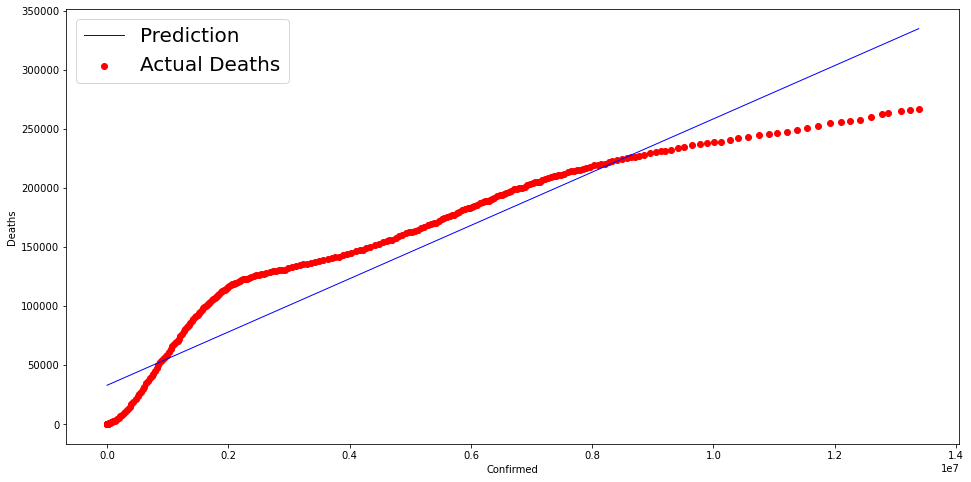

In [105]:
#linear regression
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = uk['Confirmed'].values.reshape(-1,1)
y = uk['Deaths'].values.reshape(-1,1)


reg = LinearRegression()
reg.fit(X, y)
p = reg.predict(X)
plt.figure(figsize=(16, 8))
plt.scatter(
    X,
    y,
    c='red'
)
plt.plot(
    X,
    p,
    c='blue',
    linewidth=1
)


plt.xlabel("Confirmed")
plt.ylabel("Deaths")
plt.legend(['Prediction', 'Actual Deaths'], prop={'size': 20})
plt.show()


In [98]:
uk = uk.reset_index()
uk['Days'] = uk.index

# Ill['day'] = Ill['Date'].dt.day
uk

,index,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Days
0,174,2020-01-22,US,1,0,0.0,1.0,0,0,0,0
1,363,2020-01-23,US,1,0,0.0,1.0,0,0,0,1
2,552,2020-01-24,US,2,0,0.0,2.0,1,0,0,2
3,741,2020-01-25,US,2,0,0.0,2.0,0,0,0,3
4,930,2020-01-26,US,5,0,0.0,5.0,3,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...
308,58386,2020-11-25,US,12772653,262222,4835956.0,7674475.0,181490,2297,139292,308
309,58575,2020-11-26,US,12883264,263454,4871203.0,7748607.0,110611,1232,35247,309
310,58764,2020-11-27,US,13088821,264858,4947446.0,7876517.0,205557,1404,76243,310
311,58953,2020-11-28,US,13244417,266047,5023063.0,7955307.0,155596,1189,75617,311


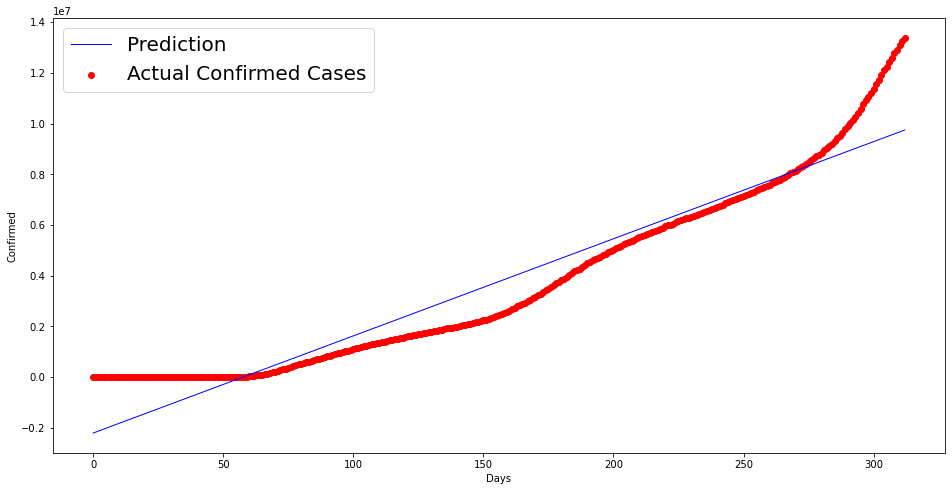

In [106]:
import datetime
import random
import matplotlib.pyplot as plt


X = uk['Days'].values.reshape(-1,1)
y = uk['Confirmed'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(X, y)
p = reg.predict(X)
plt.figure(figsize=(16, 8))
plt.scatter(
    X,
    y,
    c='red'
)
plt.plot(
    X,
    p,
    c='blue',
    linewidth=1
)

# plt.xticks(np.arange(Ill.shape[0])[::20], Ill.Date[1::20], rotation=35)

plt.legend(['Prediction', 'Actual Confirmed Cases'], prop={'size': 20})
plt.xlabel("Days")
plt.ylabel("Confirmed")
plt.show()